In [1]:
import sys
sys.path.insert(1, '../../../../utils')
from pandas import read_csv, DataFrame
from dslabs_functions import select_low_variance_variables, select_redundant_variables, study_redundancy_for_feature_selection, study_variance_for_feature_selection

from math import ceil
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import HEIGHT, evaluate_approach, plot_multiline_chart


In [2]:
# Load data (already split into train/test)
train_filename = "../../data/prepared/mvi/flight_mvi_sampled_train.csv"
test_filename = "../../data/prepared/mvi/flight_mvi_sampled_test.csv"

train_data: DataFrame = read_csv(train_filename, na_values="")
test_data: DataFrame = read_csv(test_filename, na_values="")

target = "Cancelled"
file_tag = "flight"
metric = "recall"
lab_folder_fs = "lab3_preparation/feature_selection"

print(train_data.shape, test_data.shape)

(70000, 182) (30000, 182)


In [3]:
# Remove FlightDate
train_data = train_data.drop(columns=["FlightDate"], errors="ignore")
test_data = test_data.drop(columns=["FlightDate"], errors="ignore")

### Method 1: Low variance variabels

In [4]:
# Identify low-variance variables
vars2drop: list[str] = select_low_variance_variables(train_data, 0.1, target=target)
print("Variables to drop", vars2drop)

Variables to drop ['Dest', 'DestCityName', 'Origin', 'OriginCityName', 'Tail_Number', 'Year']


Couldn't run MultinomialNB
Couldn't run MultinomialNB
Couldn't run MultinomialNB
Couldn't run MultinomialNB
Couldn't run MultinomialNB
Couldn't run MultinomialNB
Couldn't run MultinomialNB
Couldn't run MultinomialNB
Couldn't run MultinomialNB


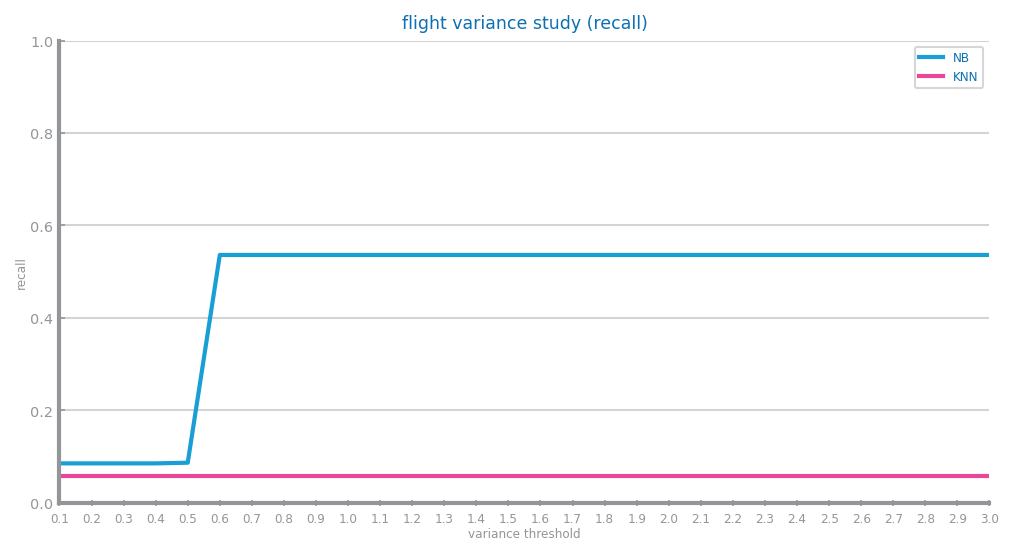

In [5]:
# Threshold analysis
figure(figsize=(2 * HEIGHT, HEIGHT))
study_variance_for_feature_selection(
    train_data,
    test_data,
    target=target,
    max_threshold=3,
    lag=0.1,
    metric=metric,
    file_tag=file_tag,
)
# savefig(f"images/{file_tag}_fs_low_var_{metric}_study.png")
show()

### Method 2: Redundant variables

In [4]:
# Local copy of select_redundant_variables with fixes
def select_redundant_variables(data: DataFrame, min_threshold: float = 0.90, target: str = "class") -> list:
    df: DataFrame = data.drop(target, axis=1, inplace=False)
    corr_matrix: DataFrame = abs(df.corr())
    variables: Index[str] = corr_matrix.columns
    vars2drop: list = []
    for v1 in variables:
        vars_corr: Series = (corr_matrix[v1]).loc[corr_matrix[v1] >= min_threshold]
        vars_corr.drop(v1, inplace=True, errors='ignore')
        if len(vars_corr) > 1:
            lst_corr = list(vars_corr.index)
            for v2 in lst_corr:
                if v2 not in vars2drop:
                    vars2drop.append(v2)
    return vars2drop

In [5]:
# Identify redundant variables
vars2drop: list[str] = select_redundant_variables(train_data, target=target, min_threshold=0.5)
print("Variables to drop", vars2drop)

print(len(vars2drop), "variables to drop due to redundancy")

# Print final variable list with for loop
final_vars = [col for col in train_data.columns if col not in vars2drop + [target]]
for var in final_vars:
    print(var)

Variables to drop ['IATA_Code_Operating_Airline_ZW', 'Operating_Airline_ZW', 'IATA_Code_Marketing_Airline_AS', 'IATA_Code_Operating_Airline_AS', 'Marketing_Airline_Network_AS', 'Operated_or_Branded_Code_Share_Partners_AS', 'Operating_Airline_AS', 'IATA_Code_Marketing_Airline_G4', 'IATA_Code_Operating_Airline_G4', 'Marketing_Airline_Network_G4', 'Operated_or_Branded_Code_Share_Partners_G4', 'Operating_Airline_G4', 'IATA_Code_Marketing_Airline_AA', 'IATA_Code_Operating_Airline_AA', 'Marketing_Airline_Network_AA', 'Operated_or_Branded_Code_Share_Partners_AA', 'Operating_Airline_AA', 'IATA_Code_Operating_Airline_PT', 'Operating_Airline_PT', 'IATA_Code_Operating_Airline_OH', 'Operating_Airline_OH', 'IATA_Code_Operating_Airline_C5', 'Operating_Airline_C5', 'IATA_Code_Marketing_Airline_DL', 'IATA_Code_Operating_Airline_DL', 'Marketing_Airline_Network_DL', 'Operated_or_Branded_Code_Share_Partners_DL', 'Operating_Airline_DL', 'IATA_Code_Operating_Airline_9E', 'Operated_or_Branded_Code_Share_Par

In [ ]:
# Threshold analysis
figure(figsize=(2 * HEIGHT, HEIGHT))
study_redundancy_for_feature_selection(
    train_data,
    test_data,
    target=target,
    min_threshold=0.25,
    lag=0.05,
    metric=metric,
    file_tag=file_tag,
)
# savefig(f"images/{file_tag}_fs_redundancy_{metric}_study.png")
show()